In [37]:
#| default_exp app

### Imports

In [1]:
#| export
from fastai.vision.all import *
from huggingface_hub import from_pretrained_fastai
import gradio as gr

repo_id = "asFrants/photo_enhancement"
def is_cat(x): return x[0].isupper() 

/home/alexander/Documents/Programming/photo_enhancement/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load and Test Model

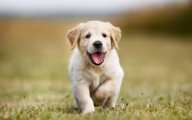

In [2]:
img = PILImage.create('./examples/dog.jpg')
img.thumbnail((192,192))
img

In [3]:
#| export
# learn = load_learner('../models/model.pkl')
learn = from_pretrained_fastai(repo_id)

Fetching 4 files: 100%|██████████| 4/4 [00:00<00:00, 79512.87it/s]


In [4]:
%time learn.predict(img)

CPU times: user 1.44 s, sys: 43.4 ms, total: 1.49 s
Wall time: 216 ms


('False', tensor(0), tensor([1.0000e+00, 2.9445e-07]))

### Useful functions 

In [5]:
#| export
# categories = ('Dog','Cat')
categories = learn.dls.vocab
def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [6]:
classify_image(img)

{False: 0.9999997615814209, True: 2.9445419613693957e-07}

In [7]:
#| export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['./examples/dog.jpg','./examples/cats.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)


/tmp/ipykernel_242930/1265085772.py:2: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(192,192))
/tmp/ipykernel_242930/1265085772.py:2: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(192,192))
/tmp/ipykernel_242930/1265085772.py:3: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label()
/tmp/ipykernel_242930/1265085772.py:3: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label()


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


In [42]:
m = learn.model
m

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [19]:
ps = list(m.parameters())
ps[0].shape

torch.Size([64, 3, 7, 7])

In [46]:
l = m.get_submodule('0.4.0.bn2')
list(l.parameters())

[Parameter containing:
 tensor([0.2498, 0.2208, 0.2760, 0.6075, 0.2657, 0.2934, 0.1136, 0.4422, 0.2854,
         0.2968, 0.2500, 0.4104, 0.4869, 0.3368, 0.4661, 0.1764, 0.2177, 0.5036,
         0.2267, 0.3681, 0.4847, 0.4580, 0.4657, 0.2203, 0.1501, 0.2765, 0.3803,
         0.2810, 0.2370, 0.3959, 0.3035, 0.3172, 0.2012, 0.2319, 0.2005, 0.1658,
         0.4686, 0.3480, 0.3404, 0.2270, 0.2481, 0.2357, 0.2729, 0.4667, 0.3431,
         0.2464, 0.4681, 0.2818, 0.6245, 0.4141, 0.3416, 0.4219, 0.1150, 0.2989,
         0.5812, 0.2793, 0.4705, 0.4495, 0.4316, 0.2747, 0.3419, 0.1145, 0.5064,
         0.4380], requires_grad=True),
 Parameter containing:
 tensor([ 2.2777e-01,  7.4792e-03, -6.7524e-02, -6.9152e-02,  3.6310e-01,
         -2.0204e-01,  1.1852e-04,  2.2515e-02,  3.9614e-01,  3.6419e-02,
          7.2314e-03,  2.7643e-01, -6.9701e-02, -2.4055e-01, -8.1287e-02,
         -9.5198e-02, -1.4382e-01,  3.7598e-02, -3.6105e-01, -3.9477e-01,
         -4.0828e-01,  3.6430e-03, -2.7760e-01, -3.5

### Export

In [8]:
from nbdev.export import nb_export
nb_export('app.ipynb', '.')